In [ ]:
pip install pycaret

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder


from pycaret.classification import *

In [ ]:
  train_path = "/content/new_train.csv"
test_path = "/content/new_test.csv"
data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("/content/new_train.csv")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
import pandas as pd
# Load data from a CSV file
df = pd.read_csv("/content/new_train.csv")

# Display basic information about the dataset
print("Original Data Info:")
print(df.info())

# Handling Missing Values
df.dropna(inplace=True)

# Removing Duplicates
df.drop_duplicates(inplace=True)

print("\nCleaned Data Info:")
print(df.info())


Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB
None

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 32942 entrie

In [ ]:
# Renaming the columns
data = data.rename(columns={"default": "default_credit",
                            "housing":"housing_loan",
                            "loan":"personal_loan",
                            "poutcome": "prev_attempt"})
columns = data.columns
test_data = test_data.rename(columns={"default": "default_credit",
                            "housing":"housing_loan",
                            "loan":"personal_loan",
                            "poutcome": "prev_attempt"})
# Adding the missing columns in the test dataset
test_data['pdays']=0
test_data['previous'] = 0
test_data['y']=0
test_data = test_data[columns]
test_data = test_data.drop(['y'], axis=1)

# Splitting the dataset as per the categorical and numerical features For EDA
cat_data = data.select_dtypes(include=['object'])
num_data = data.select_dtypes(include=['int64'])
num_data["pdays"].replace({999: 0}, inplace=True)
print(columns)

Index(['age', 'job', 'marital', 'education', 'default_credit', 'housing_loan',
       'personal_loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'prev_attempt', 'y'],
      dtype='object')


In [ ]:
def univariate_cat_plots(df):
    for feature in df.columns:
        plt.figure(figsize=(12,6))
        sns.set_theme(context='notebook',style='darkgrid',palette='deep',color_codes=True)
        sns.countplot(x=feature,data=df,palette="dark",orient='v')
        plt.xlabel(feature)
        plt.title("Univariate analysis of categorical feature")
        plt.show()

def multivariate_cat_plots(df):
    for feature in df.columns:
        plt.figure(figsize=(12,6))
        sns.set_theme(context='notebook',style='whitegrid',palette='deep',color_codes=True)
        sns.countplot(x=feature,data=df,palette="dark",hue = 'y',orient='v')
        plt.xlabel(feature)
        plt.title("Biivariate analysis of categorical feature")
        plt.show()

def num_plots(df):
    for feature in df.columns:
        plt.figure(figsize=(12,6))
        sns.kdeplot(data=df, x =feature)
        plt.xlabel(feature)
        plt.title("Univariate Analysis of Numerical Features")
        plt.show()



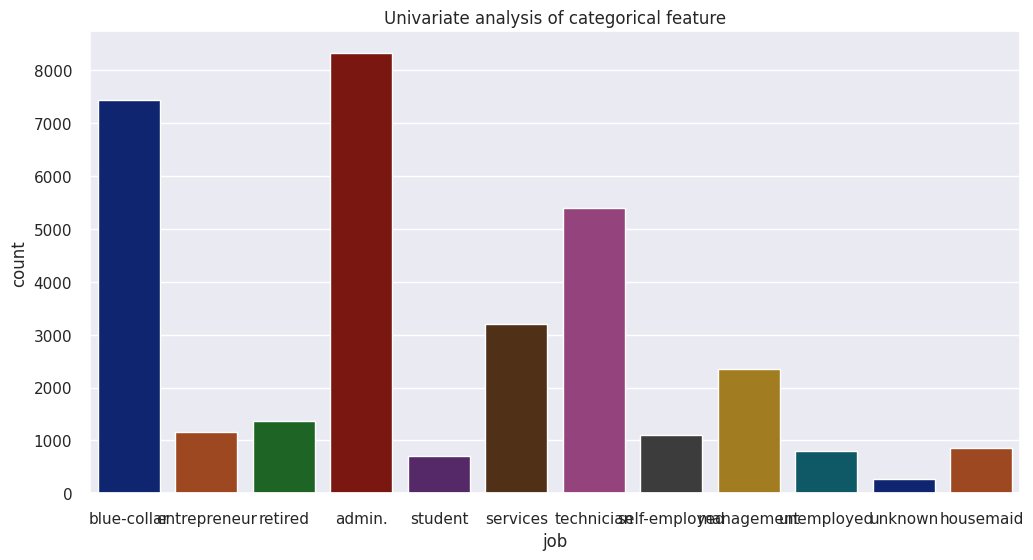

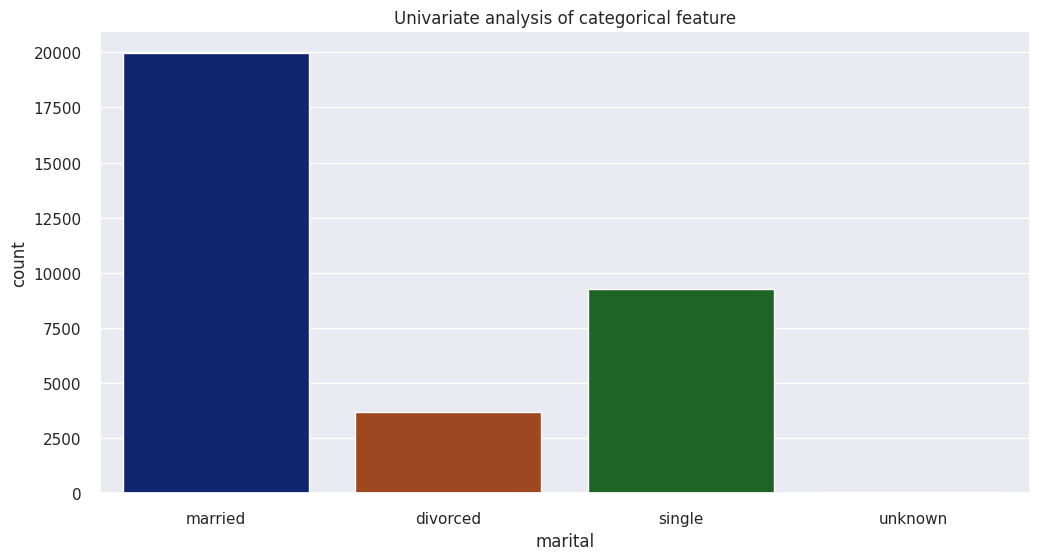

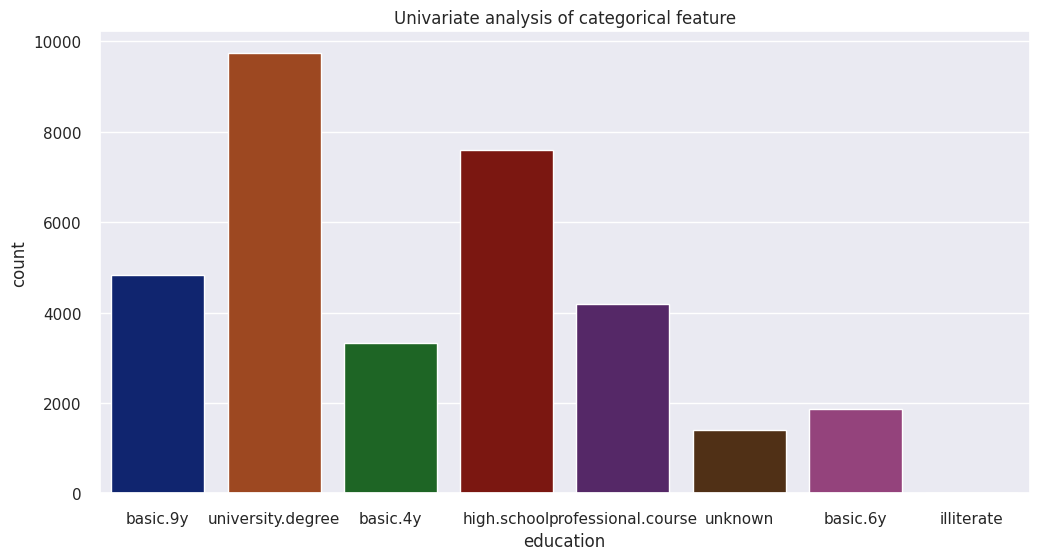

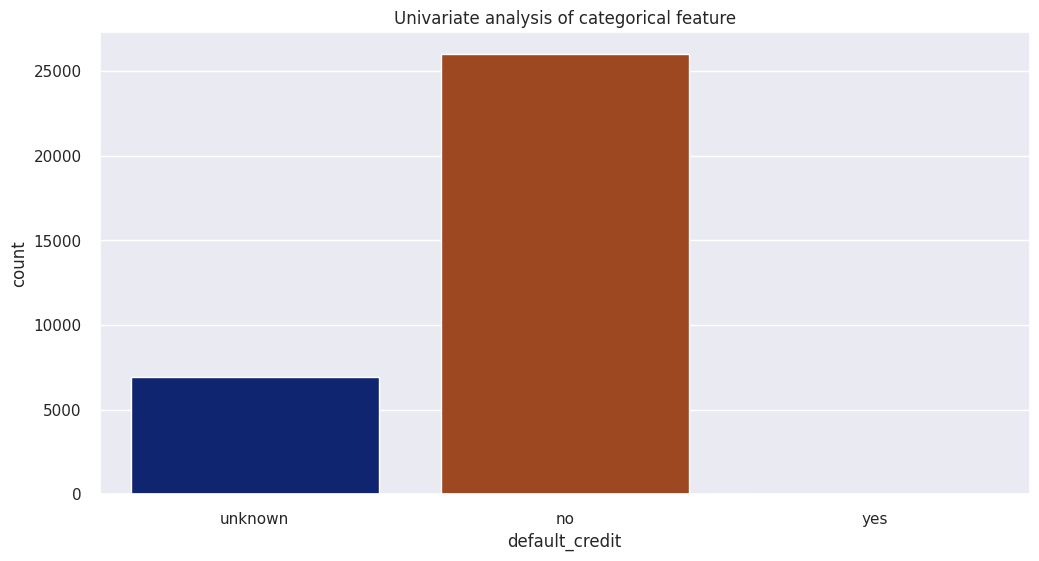

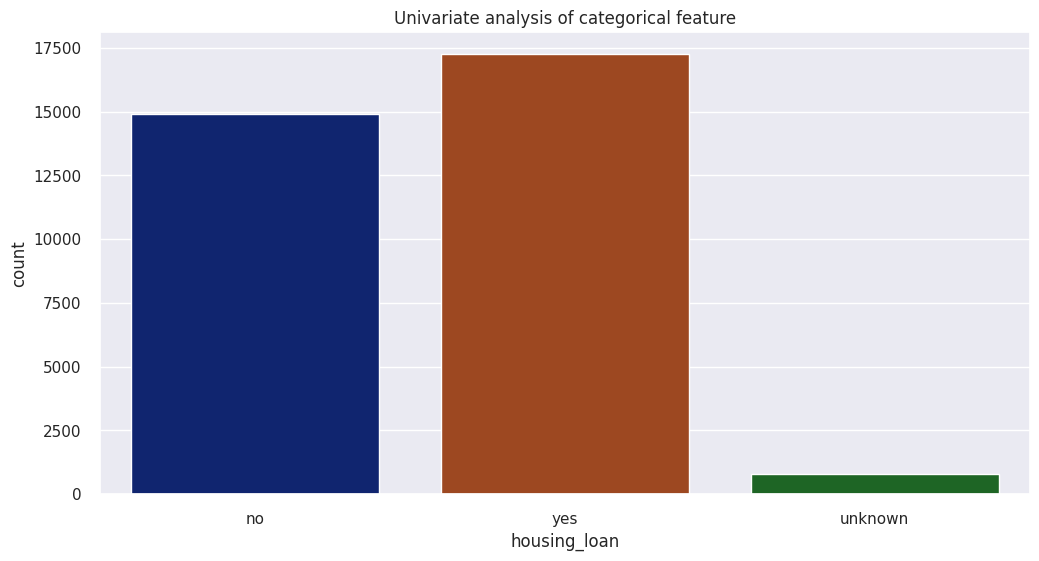

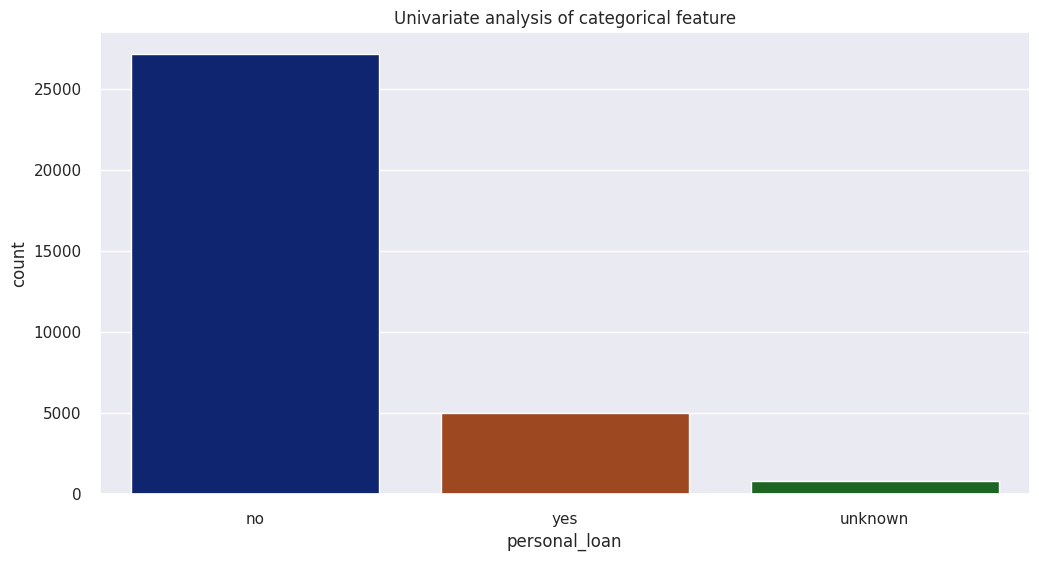

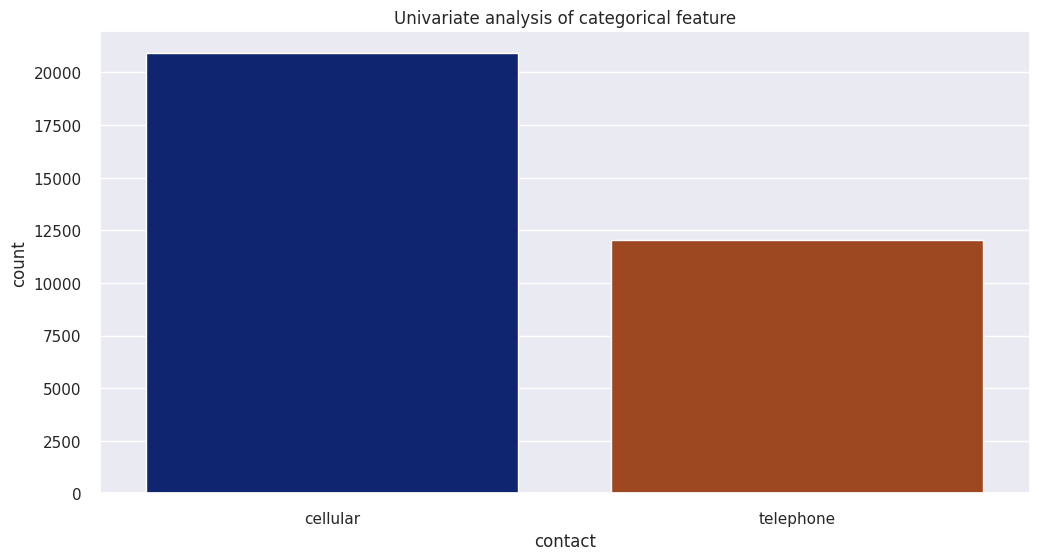

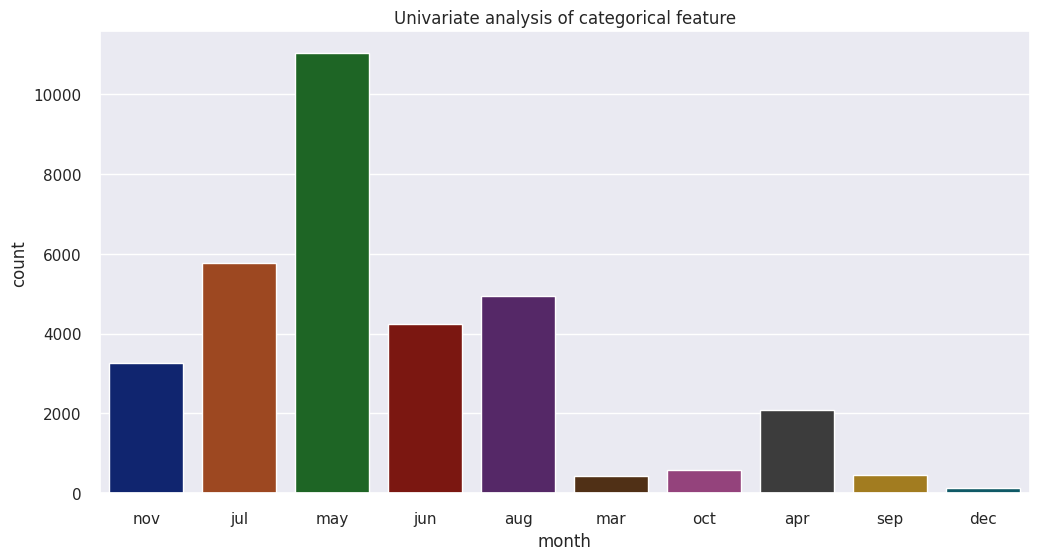

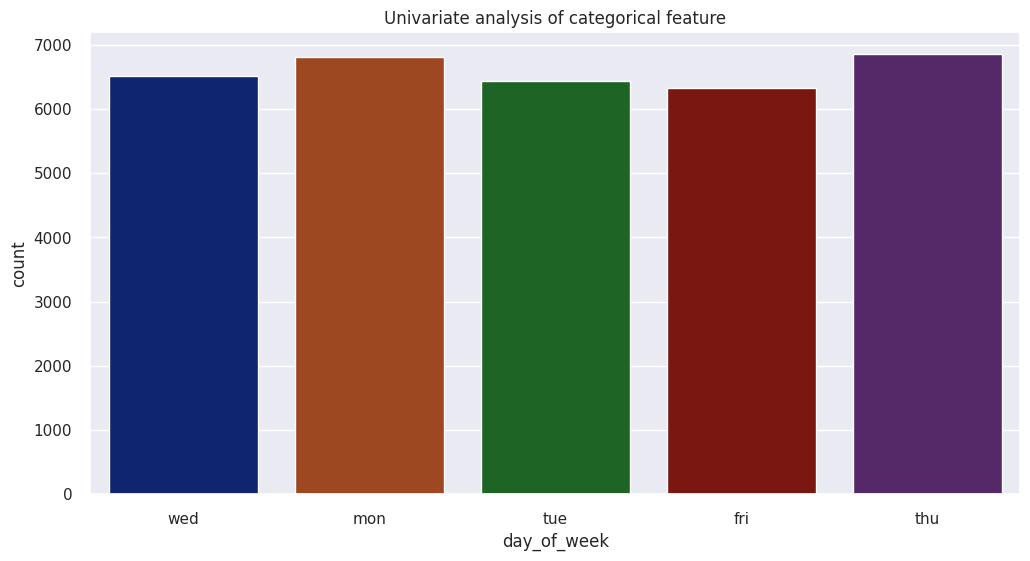

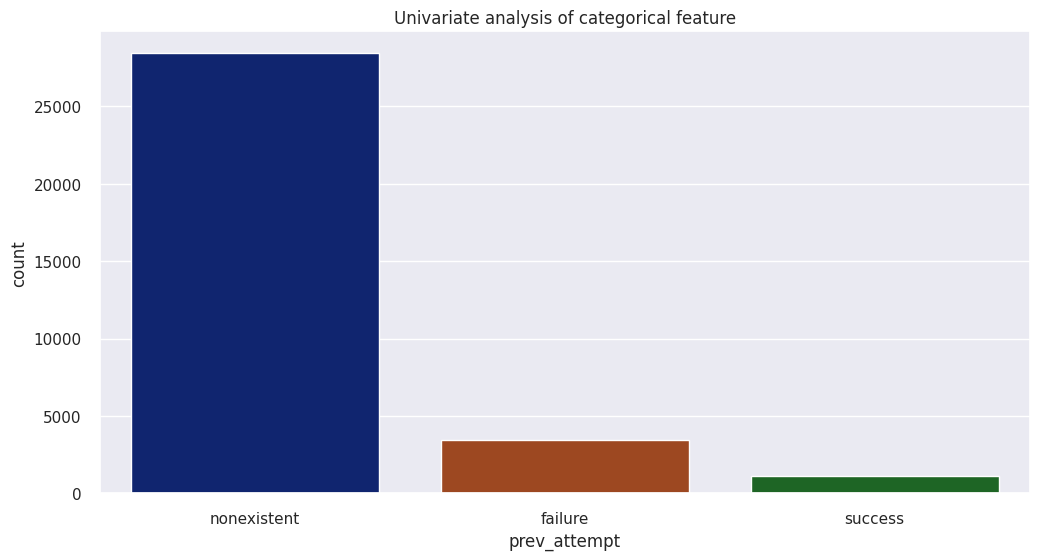

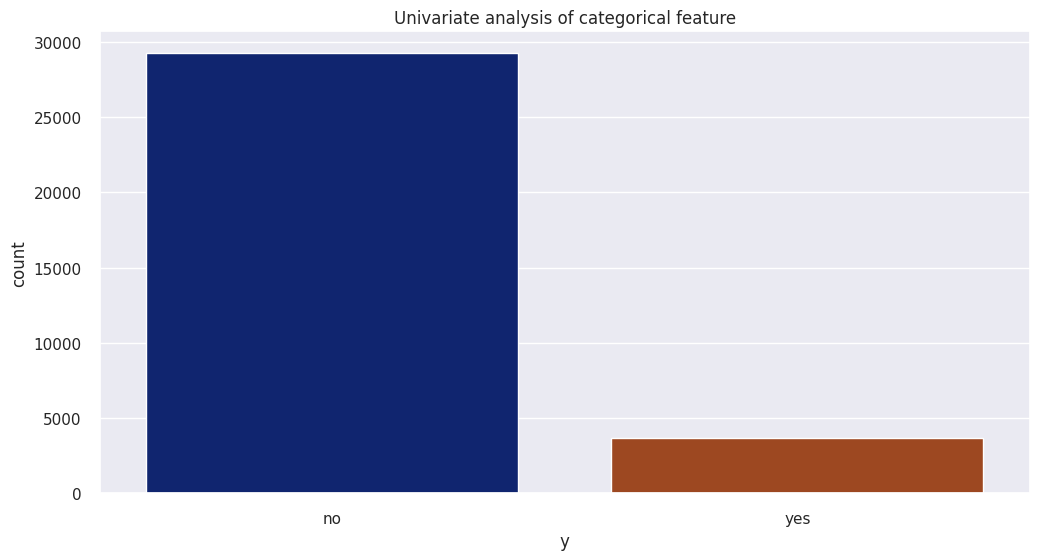

In [ ]:
univariate_cat_plots(cat_data)

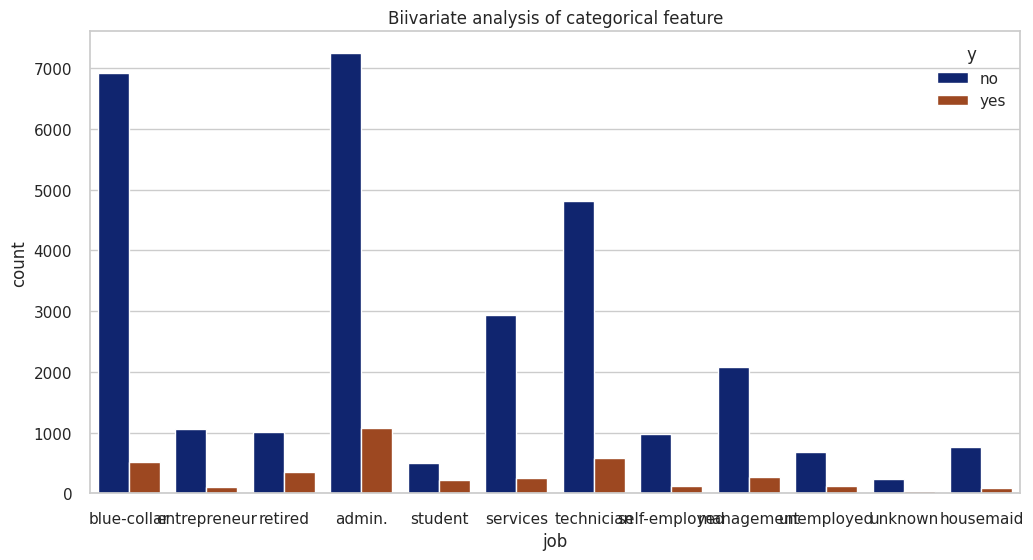

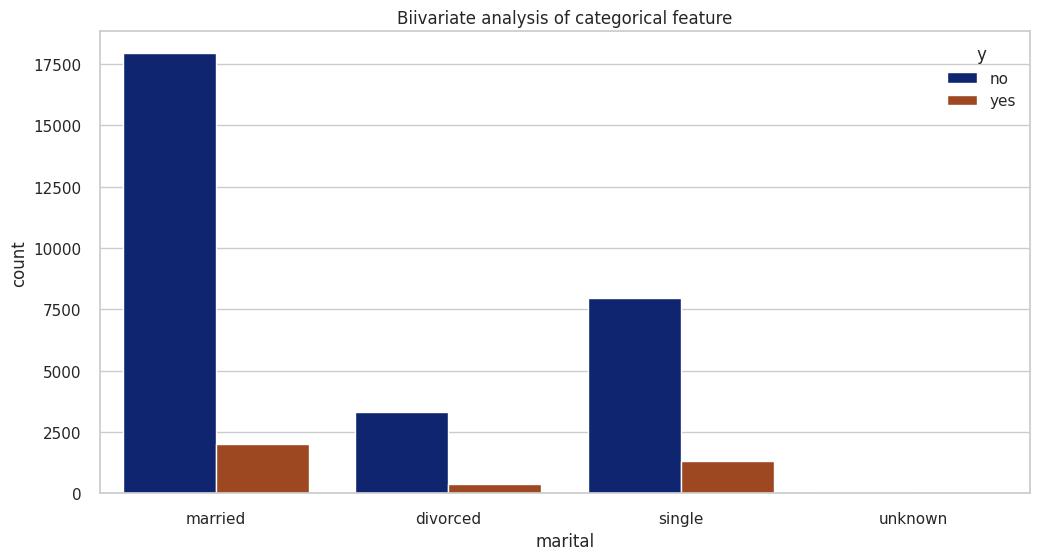

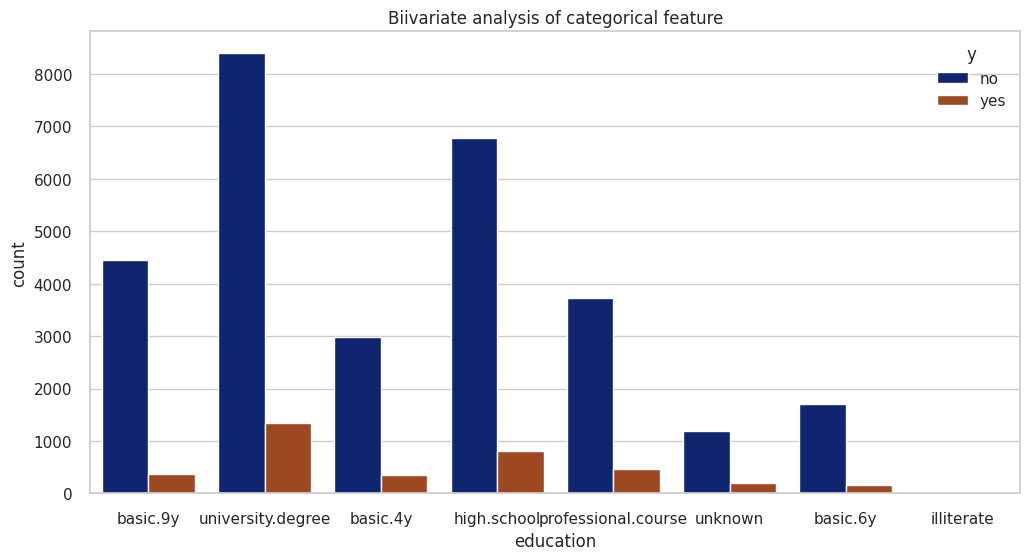

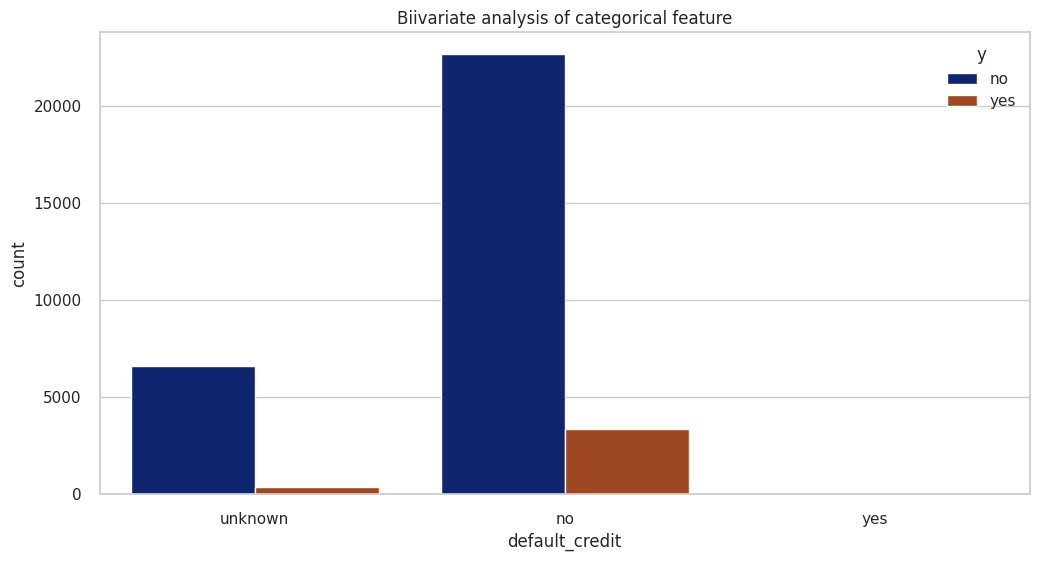

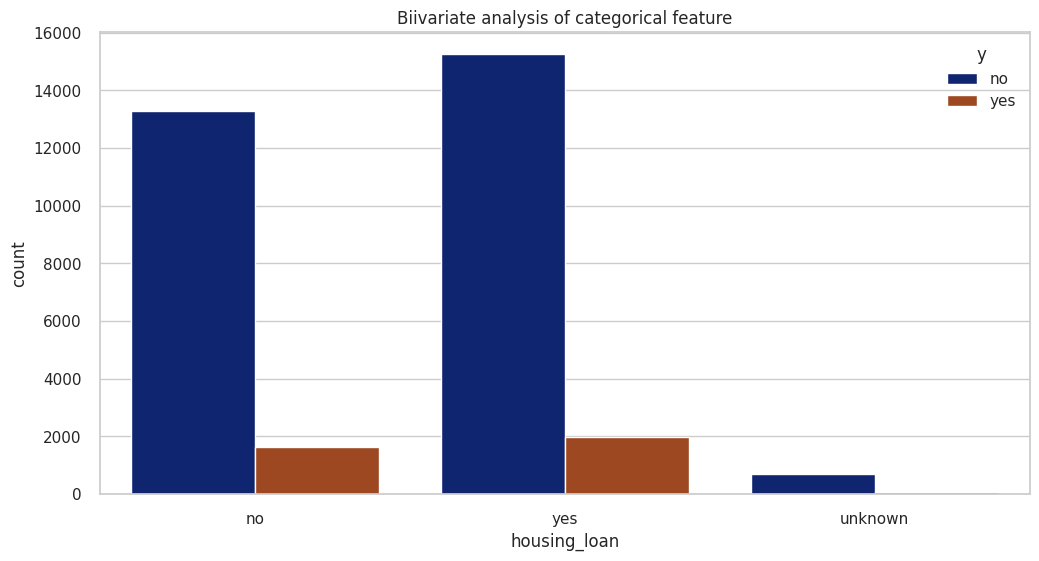

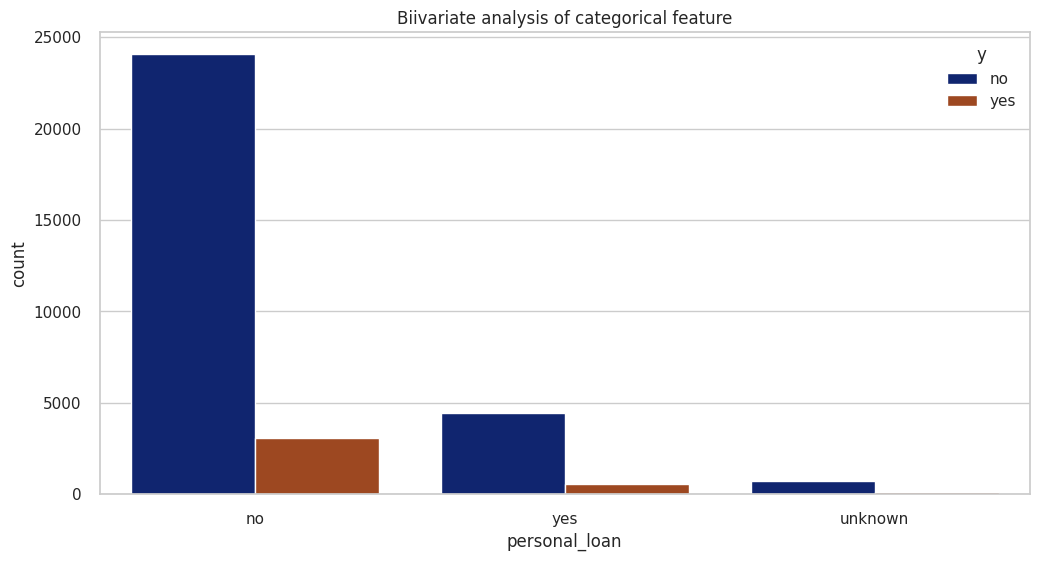

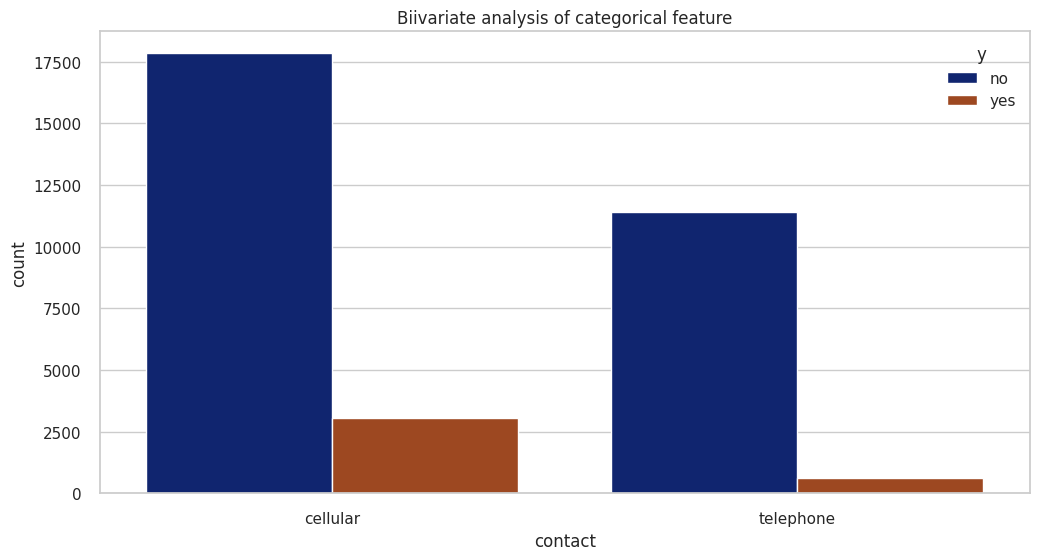

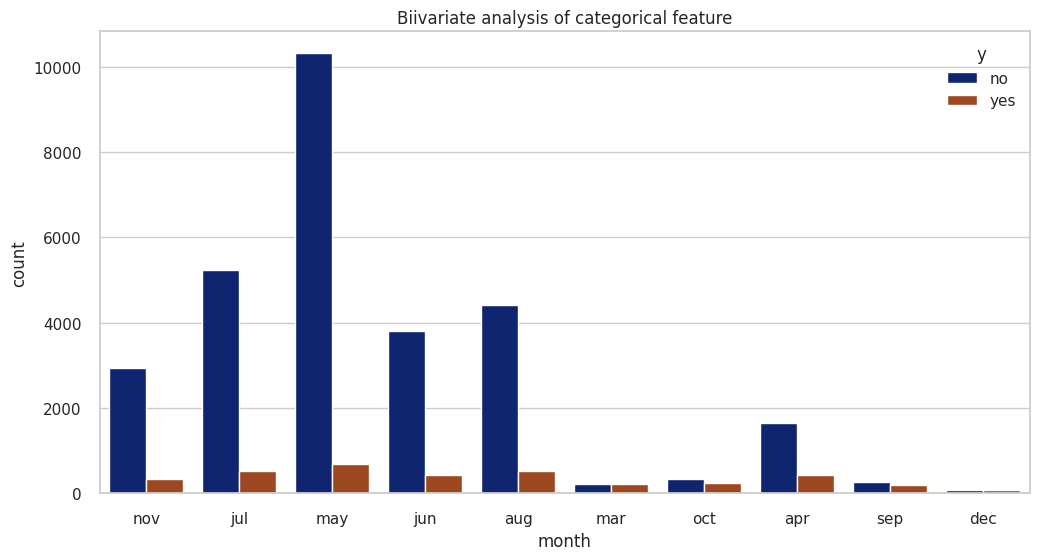

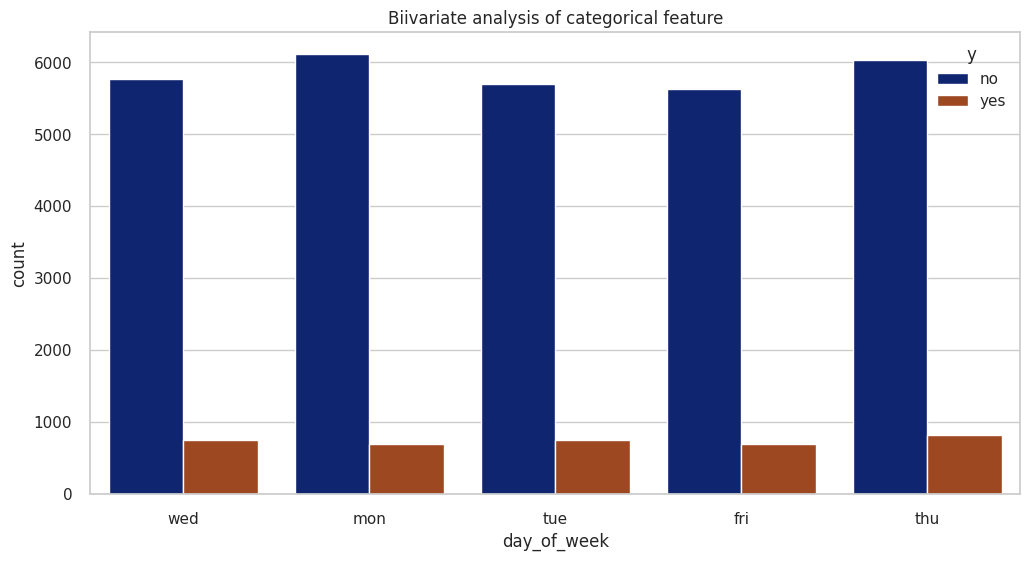

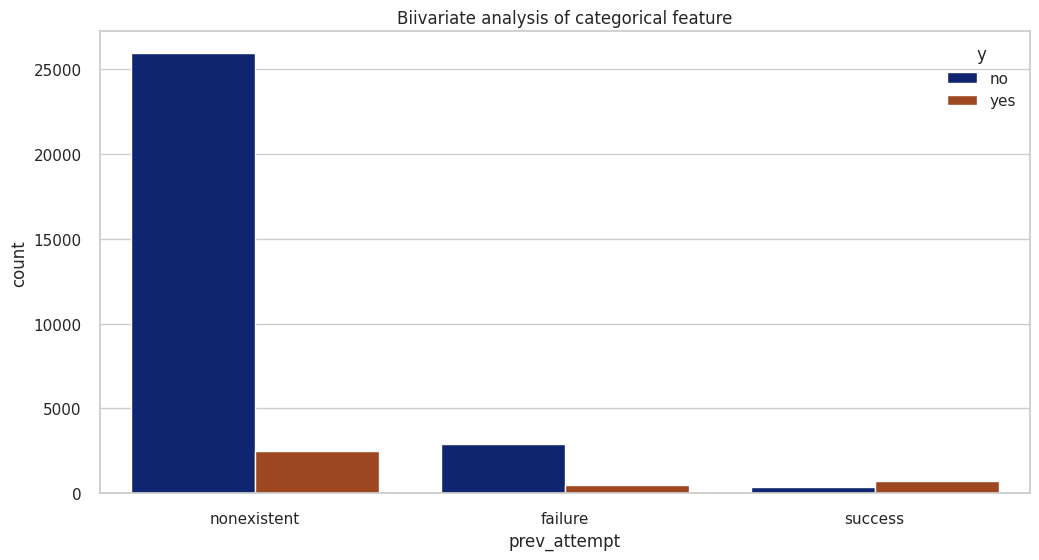

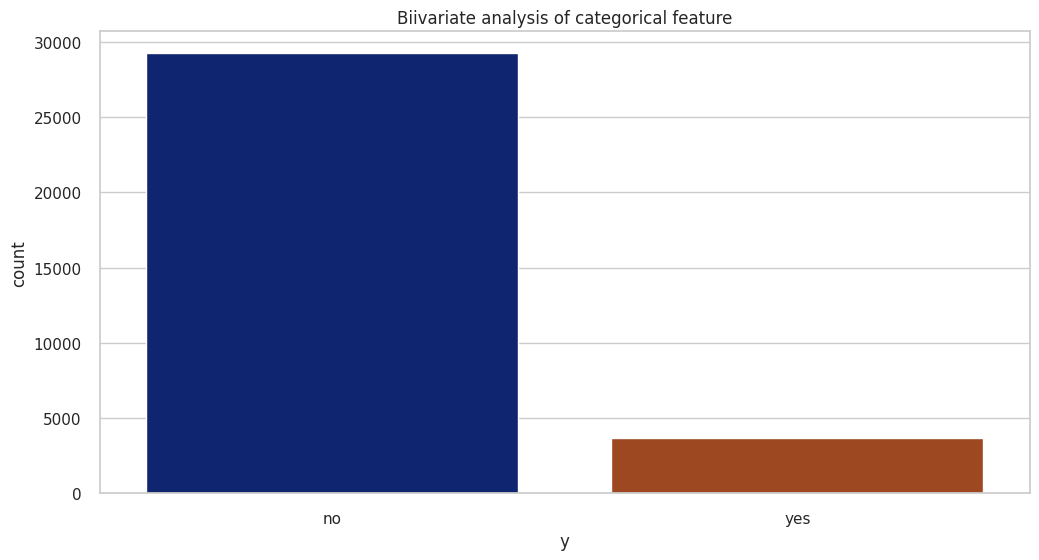

In [ ]:
multivariate_cat_plots(cat_data)

In [ ]:
le = LabelEncoder()
cat_data= cat_data[cat_data.columns].apply(lambda col: le.fit_transform(col))

# Merging both dataframes
bank_data = pd.concat([cat_data,num_data],axis =1)
bank_data = bank_data[columns]
bank_data

,age,job,marital,education,default_credit,housing_loan,personal_loan,contact,month,day_of_week,duration,campaign,pdays,previous,prev_attempt,y
0,49,1,1,2,1,0,0,0,7,4,227,4,0,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,1,0,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,0,0,1,1
3,36,0,1,6,0,2,0,1,6,1,120,2,0,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,2,0,0,3,3,192,1,0,0,1,0
32946,52,9,1,5,0,2,0,0,7,0,64,1,0,1,0,0
32947,54,0,1,2,0,0,2,0,3,1,131,4,0,0,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,0,0,1,0


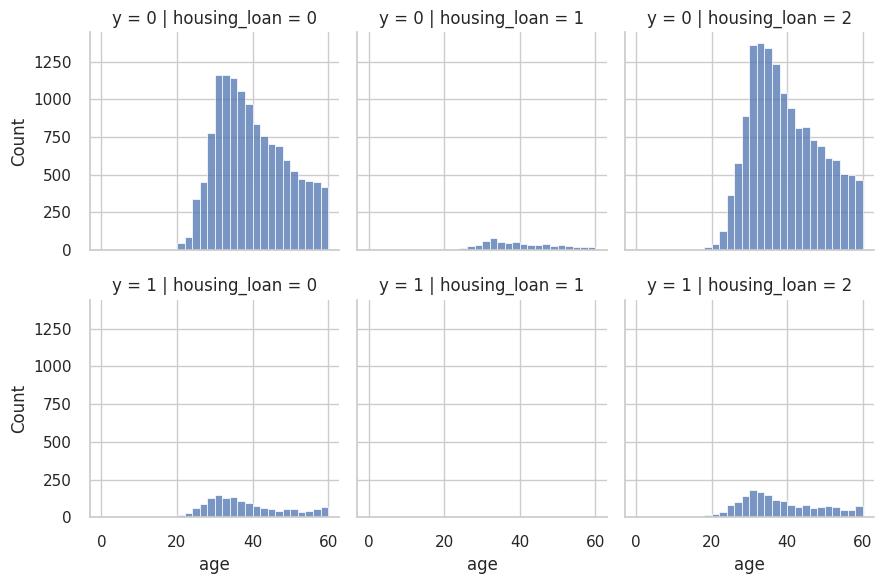

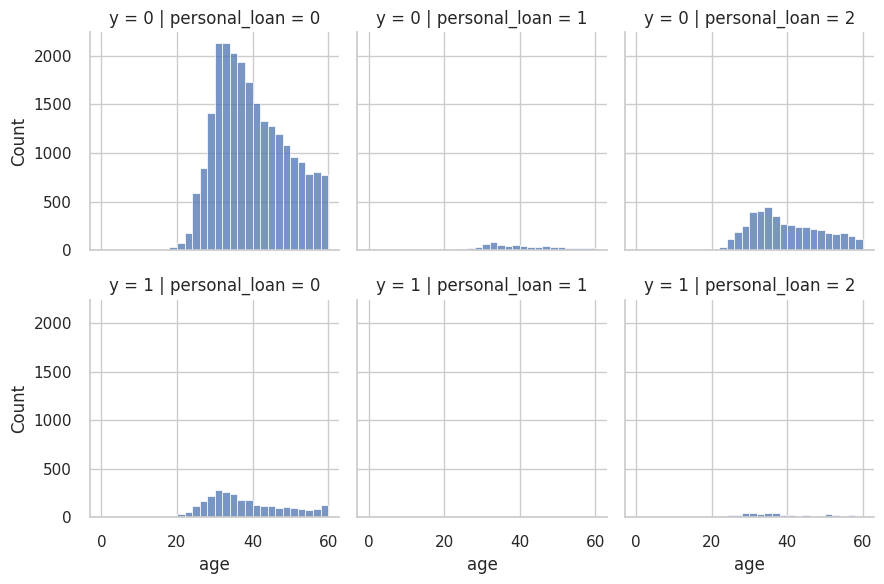

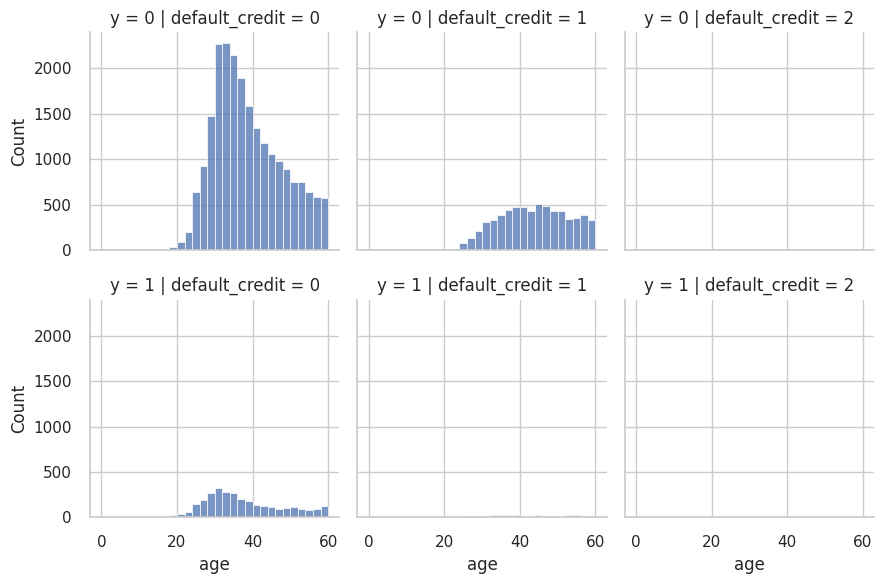

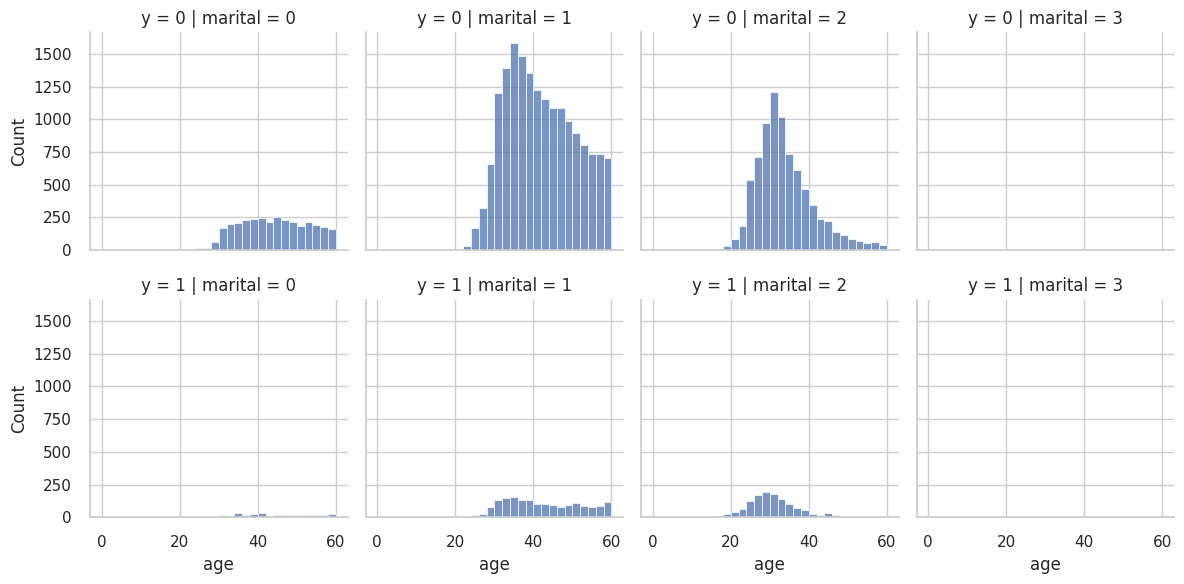

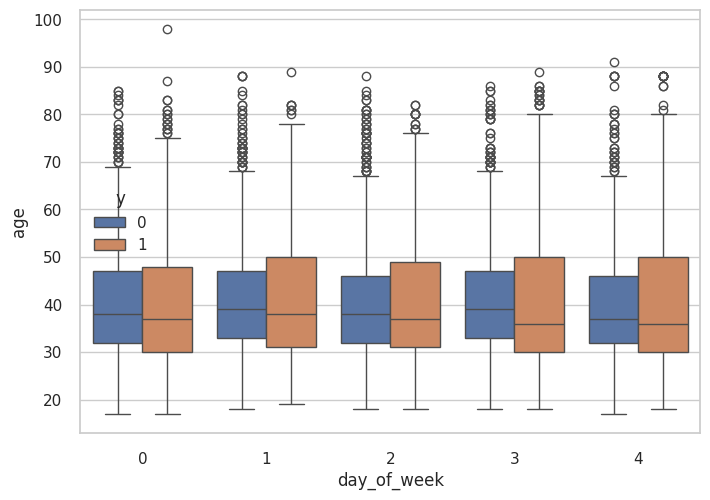

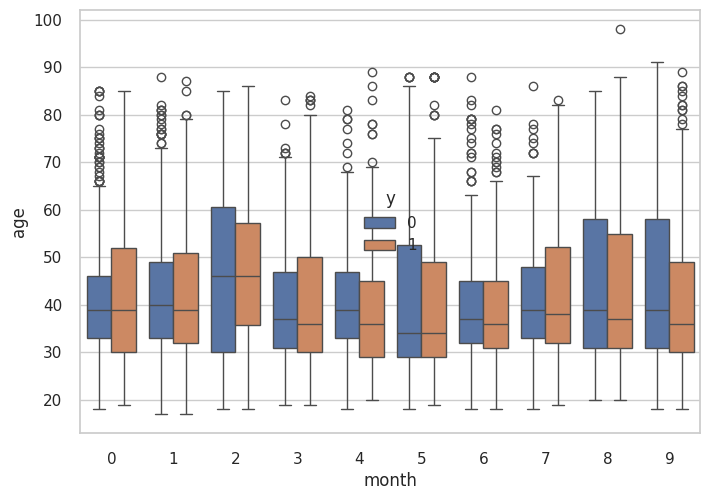

In [ ]:
def grid_plots(bank_data):
    for feature in ['housing_loan','personal_loan','default_credit','marital']:
        sns.color_palette('tab10')
        grid = sns.FacetGrid(bank_data, col=feature, row='y')
        grid.map_dataframe(sns.histplot,x='age',binwidth=2, binrange=(0, 60))
        plt.show()
grid_plots(bank_data)


sns.boxplot(data=bank_data,x='day_of_week', y='age',hue='y')
plt.show()
sns.boxplot(data=bank_data,x='month', y='age',hue='y')
plt.show()


##  Creating the Model and training the Model - PyCaret

In [ ]:
env = setup(data= bank_data, target='y',train_size=0.99,normalize=True, normalize_method='robust', session_id=40)

,Description,Value
0,Session id,40
1,Target,y
2,Target type,Binary
3,Original data shape,"(32950, 16)"
4,Transformed data shape,"(32950, 16)"
5,Transformed train set shape,"(32620, 16)"
6,Transformed test set shape,"(330, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
model = compare_models(fold =10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:21:02
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9021,0.8864,0.3015,0.6399,0.4096,0.3636,0.3946,1.2120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9112,0.9310,0.4781,0.6431,0.5481,0.5001,0.5070,4.3760
gbc,Gradient Boosting Classifier,0.9090,0.9254,0.4223,0.6474,0.5107,0.4630,0.4761,3.8240
xgboost,Extreme Gradient Boosting,0.9084,0.9259,0.4715,0.6240,0.5369,0.4872,0.4932,0.4540
rf,Random Forest Classifier,0.9057,0.9204,0.3916,0.6318,0.4833,0.4345,0.4497,3.9000
ada,Ada Boost Classifier,0.9036,0.9131,0.3741,0.6201,0.4662,0.4167,0.4331,1.2660
lda,Linear Discriminant Analysis,0.9028,0.8860,0.3981,0.6049,0.4799,0.4288,0.4404,0.1300
lr,Logistic Regression,0.9021,0.8864,0.3015,0.6399,0.4096,0.3636,0.3946,1.2120
et,Extra Trees Classifier,0.9006,0.9087,0.3069,0.6186,0.4100,0.3624,0.3892,3.5160
ridge,Ridge Classifier,0.9001,0.8860,0.2405,0.6558,0.3514,0.3097,0.3562,0.1940
svm,SVM - Linear Kernel,0.8971,0.8057,0.1954,0.6621,0.2962,0.2583,0.3167,0.3080


In [ ]:
best_model = create_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9062,0.9305,0.4714,0.6070,0.5307,0.4795,0.4842
1,0.9132,0.9292,0.4687,0.6615,0.5486,0.5022,0.5113
2,0.9114,0.9343,0.4578,0.6512,0.5376,0.4903,0.4996
3,0.9111,0.9230,0.4823,0.6390,0.5497,0.5014,0.5075
4,0.9056,0.9271,0.4905,0.5980,0.5389,0.4869,0.4899
5,0.9077,0.9249,0.4701,0.6201,0.5348,0.4846,0.4904
6,0.9083,0.9222,0.4728,0.6237,0.5379,0.4881,0.4938
7,0.9166,0.9331,0.5054,0.6739,0.5776,0.5324,0.5392
8,0.9169,0.9429,0.4864,0.6858,0.5692,0.5247,0.5341


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9040,0.9297,0.4441,0.5993,0.5102,0.4583,0.4646
1,0.9111,0.9268,0.4687,0.6442,0.5426,0.4947,0.5024
2,0.9093,0.9323,0.4496,0.6371,0.5272,0.4786,0.4875
3,0.9108,0.9194,0.4741,0.6397,0.5446,0.4964,0.5032
4,0.9065,0.9260,0.4905,0.6040,0.5414,0.4899,0.4932
5,0.9053,0.9229,0.4484,0.6089,0.5164,0.4653,0.4720
6,0.9090,0.9193,0.4565,0.6340,0.5308,0.4819,0.4898
7,0.9172,0.9308,0.4973,0.6828,0.5755,0.5309,0.5391
8,0.9209,0.9399,0.5217,0.7007,0.5981,0.5553,0.5627


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


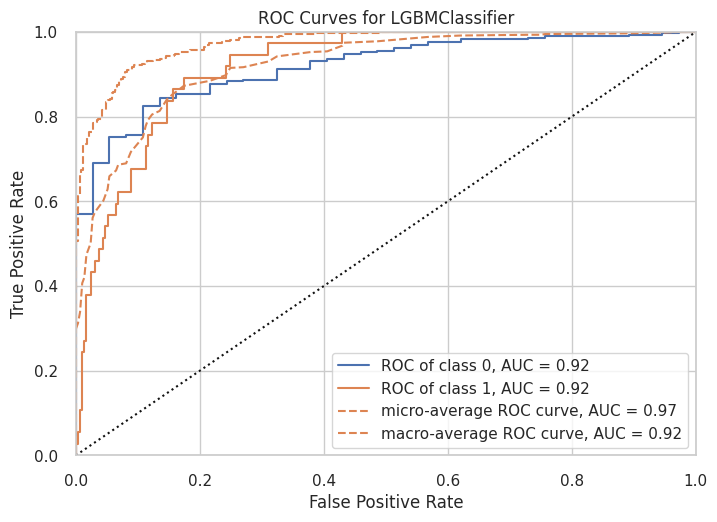

In [ ]:
plot_model(tuned_model)

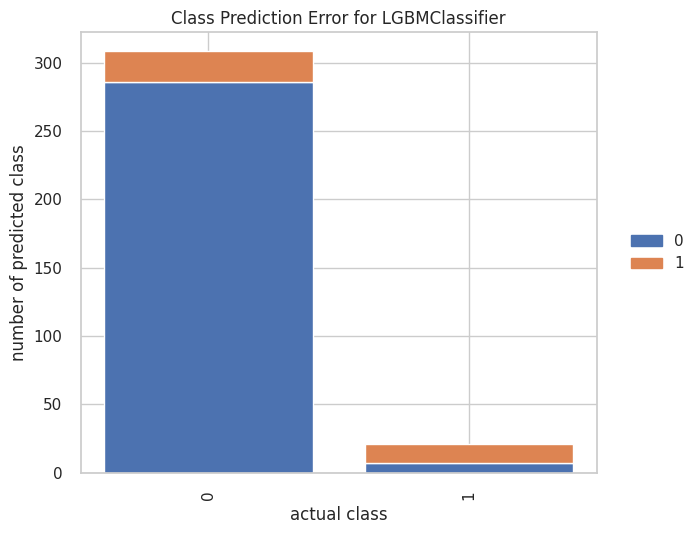

In [ ]:
plot_model(tuned_model,plot='error')

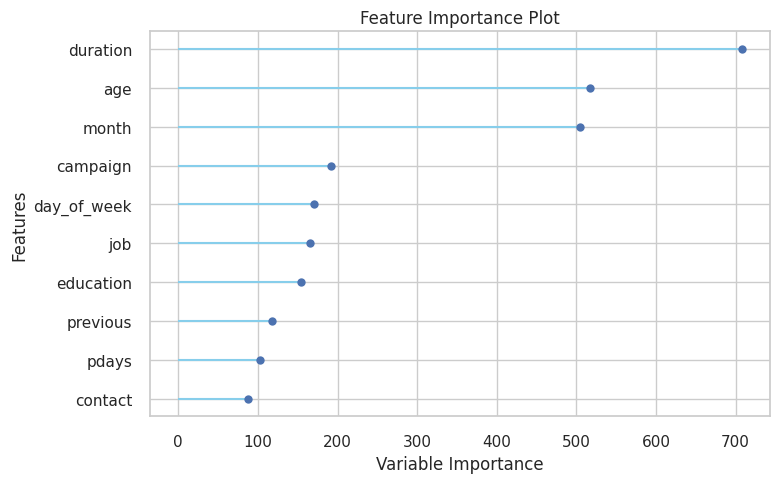

In [ ]:
plot_model(tuned_model,plot='feature')

In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
result_df = predict_model(tuned_model,test_data)
result_df.head()

,age,job,marital,education,default_credit,housing_loan,personal_loan,contact,month,day_of_week,duration,campaign,pdays,previous,prev_attempt,prediction_label,prediction_score
0,32,4,0,6,0,0,0,0,3,3,131,5,0,0,1,0,0.9894
1,37,10,3,6,0,0,0,0,4,3,100,1,0,0,1,0,0.9146
2,55,5,0,5,1,2,0,0,3,2,131,2,0,0,1,0,0.9966
3,44,2,1,0,1,0,0,1,4,3,48,2,0,0,1,0,0.9999
4,28,0,2,3,0,0,0,0,5,0,144,2,0,0,1,0,0.7661


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'banking_investment_model.joblib')